In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy
from nltk.probability import FreqDist
from wordcloud import WordCloud
pd.set_option('display.max_colwidth',100)

In [2]:
df = pd.read_csv('Data/Fake_Real_News_Data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


,Unnamed: 0,title,text,label
0,0,A whirlwind day in D.C. showcases Trump’s unorthodox views and shifting tone,Donald Trump endorsed an unabashedly noninterventionist approach to world affairs Monday during ...,REAL
1,1,"In Baltimore's call for federal police probe, a new search for answers (+video)","While some Justice Department investigations are adversarial, a new model of collaborative refor...",REAL
2,2,Trump Proudly Declares: Most Of The People I’ve Insulted Deserved It,Trump Proudly Declares: Most Of The People I’ve Insulted Deserved It By Andrew Bradford on Octob...,FAKE
3,3,Inside the Trump-Bush melodrama: Decades of tension and discomfort,Donald Trump spent a day in January 2014 hobnobbing with politicians at the Trump International ...,REAL
4,4,Shutdown clash to return in force by December,"Notable names include Ray Washburne (Commerce), a Dallas-based investor, is reported to be under...",REAL


In [3]:
df = df.drop(columns='Unnamed: 0')

In [4]:
df.duplicated().sum().sum()

29

In [5]:
df = df.drop_duplicates()
df.duplicated().sum().sum()

0

In [6]:
df['lower_text'] = df['text'].str.lower()
df.head()

,title,text,label,lower_text
0,A whirlwind day in D.C. showcases Trump’s unorthodox views and shifting tone,Donald Trump endorsed an unabashedly noninterventionist approach to world affairs Monday during ...,REAL,donald trump endorsed an unabashedly noninterventionist approach to world affairs monday during ...
1,"In Baltimore's call for federal police probe, a new search for answers (+video)","While some Justice Department investigations are adversarial, a new model of collaborative refor...",REAL,"while some justice department investigations are adversarial, a new model of collaborative refor..."
2,Trump Proudly Declares: Most Of The People I’ve Insulted Deserved It,Trump Proudly Declares: Most Of The People I’ve Insulted Deserved It By Andrew Bradford on Octob...,FAKE,trump proudly declares: most of the people i’ve insulted deserved it by andrew bradford on octob...
3,Inside the Trump-Bush melodrama: Decades of tension and discomfort,Donald Trump spent a day in January 2014 hobnobbing with politicians at the Trump International ...,REAL,donald trump spent a day in january 2014 hobnobbing with politicians at the trump international ...
4,Shutdown clash to return in force by December,"Notable names include Ray Washburne (Commerce), a Dallas-based investor, is reported to be under...",REAL,"notable names include ray washburne (commerce), a dallas-based investor, is reported to be under..."


In [7]:
nltk.download('punkt')

df['tokens'] = df['lower_text'].apply(nltk.word_tokenize)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\carlo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,title,text,label,lower_text,tokens
0,A whirlwind day in D.C. showcases Trump’s unorthodox views and shifting tone,Donald Trump endorsed an unabashedly noninterventionist approach to world affairs Monday during ...,REAL,donald trump endorsed an unabashedly noninterventionist approach to world affairs monday during ...,"[donald, trump, endorsed, an, unabashedly, noninterventionist, approach, to, world, affairs, mon..."
1,"In Baltimore's call for federal police probe, a new search for answers (+video)","While some Justice Department investigations are adversarial, a new model of collaborative refor...",REAL,"while some justice department investigations are adversarial, a new model of collaborative refor...","[while, some, justice, department, investigations, are, adversarial, ,, a, new, model, of, colla..."
2,Trump Proudly Declares: Most Of The People I’ve Insulted Deserved It,Trump Proudly Declares: Most Of The People I’ve Insulted Deserved It By Andrew Bradford on Octob...,FAKE,trump proudly declares: most of the people i’ve insulted deserved it by andrew bradford on octob...,"[trump, proudly, declares, :, most, of, the, people, i, ’, ve, insulted, deserved, it, by, andre..."
3,Inside the Trump-Bush melodrama: Decades of tension and discomfort,Donald Trump spent a day in January 2014 hobnobbing with politicians at the Trump International ...,REAL,donald trump spent a day in january 2014 hobnobbing with politicians at the trump international ...,"[donald, trump, spent, a, day, in, january, 2014, hobnobbing, with, politicians, at, the, trump,..."
4,Shutdown clash to return in force by December,"Notable names include Ray Washburne (Commerce), a Dallas-based investor, is reported to be under...",REAL,"notable names include ray washburne (commerce), a dallas-based investor, is reported to be under...","[notable, names, include, ray, washburne, (, commerce, ), ,, a, dallas-based, investor, ,, is, r..."


In [8]:
nlp_model = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
nlp_model.pipe_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']

In [9]:
doc = nlp_model('text')
type(doc)

spacy.tokens.doc.Doc

In [10]:
def spacy_process(lower_text):
        """Lemmatize tokens, lower case, remove punctuation, spaces, and stop words"""
        doc = nlp_model(lower_text)
        processed_doc = [token.lemma_
                         for token in doc if not token.is_punct and not token.is_stop]
        return processed_doc

## process the tweets using the spacy function
df['lemmas'] = df['lower_text'].apply(spacy_process)
df.head()

,title,text,label,lower_text,tokens,lemmas
0,A whirlwind day in D.C. showcases Trump’s unorthodox views and shifting tone,Donald Trump endorsed an unabashedly noninterventionist approach to world affairs Monday during ...,REAL,donald trump endorsed an unabashedly noninterventionist approach to world affairs monday during ...,"[donald, trump, endorsed, an, unabashedly, noninterventionist, approach, to, world, affairs, mon...","[donald, trump, endorse, unabashedly, noninterventionist, approach, world, affair, monday, day, ..."
1,"In Baltimore's call for federal police probe, a new search for answers (+video)","While some Justice Department investigations are adversarial, a new model of collaborative refor...",REAL,"while some justice department investigations are adversarial, a new model of collaborative refor...","[while, some, justice, department, investigations, are, adversarial, ,, a, new, model, of, colla...","[justice, department, investigation, adversarial, new, model, collaborative, reform, surprising,..."
2,Trump Proudly Declares: Most Of The People I’ve Insulted Deserved It,Trump Proudly Declares: Most Of The People I’ve Insulted Deserved It By Andrew Bradford on Octob...,FAKE,trump proudly declares: most of the people i’ve insulted deserved it by andrew bradford on octob...,"[trump, proudly, declares, :, most, of, the, people, i, ’, ve, insulted, deserved, it, by, andre...","[trump, proudly, declare, people, insult, deserve, andrew, bradford, october, 27, 2016, subscrib..."
3,Inside the Trump-Bush melodrama: Decades of tension and discomfort,Donald Trump spent a day in January 2014 hobnobbing with politicians at the Trump International ...,REAL,donald trump spent a day in january 2014 hobnobbing with politicians at the trump international ...,"[donald, trump, spent, a, day, in, january, 2014, hobnobbing, with, politicians, at, the, trump,...","[donald, trump, spend, day, january, 2014, hobnob, politician, trump, international, golf, club,..."
4,Shutdown clash to return in force by December,"Notable names include Ray Washburne (Commerce), a Dallas-based investor, is reported to be under...",REAL,"notable names include ray washburne (commerce), a dallas-based investor, is reported to be under...","[notable, names, include, ray, washburne, (, commerce, ), ,, a, dallas-based, investor, ,, is, r...","[notable, name, include, ray, washburne, commerce, dallas, base, investor, report, consideration..."


In [11]:
df['lemmas_joined'] = df['lemmas'].map(lambda x: " ".join(x))
df.head()

,title,text,label,lower_text,tokens,lemmas,lemmas_joined
0,A whirlwind day in D.C. showcases Trump’s unorthodox views and shifting tone,Donald Trump endorsed an unabashedly noninterventionist approach to world affairs Monday during ...,REAL,donald trump endorsed an unabashedly noninterventionist approach to world affairs monday during ...,"[donald, trump, endorsed, an, unabashedly, noninterventionist, approach, to, world, affairs, mon...","[donald, trump, endorse, unabashedly, noninterventionist, approach, world, affair, monday, day, ...",donald trump endorse unabashedly noninterventionist approach world affair monday day long tour w...
1,"In Baltimore's call for federal police probe, a new search for answers (+video)","While some Justice Department investigations are adversarial, a new model of collaborative refor...",REAL,"while some justice department investigations are adversarial, a new model of collaborative refor...","[while, some, justice, department, investigations, are, adversarial, ,, a, new, model, of, colla...","[justice, department, investigation, adversarial, new, model, collaborative, reform, surprising,...",justice department investigation adversarial new model collaborative reform surprising police ci...
2,Trump Proudly Declares: Most Of The People I’ve Insulted Deserved It,Trump Proudly Declares: Most Of The People I’ve Insulted Deserved It By Andrew Bradford on Octob...,FAKE,trump proudly declares: most of the people i’ve insulted deserved it by andrew bradford on octob...,"[trump, proudly, declares, :, most, of, the, people, i, ’, ve, insulted, deserved, it, by, andre...","[trump, proudly, declare, people, insult, deserve, andrew, bradford, october, 27, 2016, subscrib...",trump proudly declare people insult deserve andrew bradford october 27 2016 subscribe \n arrogan...
3,Inside the Trump-Bush melodrama: Decades of tension and discomfort,Donald Trump spent a day in January 2014 hobnobbing with politicians at the Trump International ...,REAL,donald trump spent a day in january 2014 hobnobbing with politicians at the trump international ...,"[donald, trump, spent, a, day, in, january, 2014, hobnobbing, with, politicians, at, the, trump,...","[donald, trump, spend, day, january, 2014, hobnob, politician, trump, international, golf, club,...",donald trump spend day january 2014 hobnob politician trump international golf club west palm be...
4,Shutdown clash to return in force by December,"Notable names include Ray Washburne (Commerce), a Dallas-based investor, is reported to be under...",REAL,"notable names include ray washburne (commerce), a dallas-based investor, is reported to be under...","[notable, names, include, ray, washburne, (, commerce, ), ,, a, dallas-based, investor, ,, is, r...","[notable, name, include, ray, washburne, commerce, dallas, base, investor, report, consideration...",notable name include ray washburne commerce dallas base investor report consideration lead depar...


In [12]:
type(df['lemmas'][0])

list

In [13]:
df['length'] = df['tokens'].map(len)
df.head(2)

,title,text,label,lower_text,tokens,lemmas,lemmas_joined,length
0,A whirlwind day in D.C. showcases Trump’s unorthodox views and shifting tone,Donald Trump endorsed an unabashedly noninterventionist approach to world affairs Monday during ...,REAL,donald trump endorsed an unabashedly noninterventionist approach to world affairs monday during ...,"[donald, trump, endorsed, an, unabashedly, noninterventionist, approach, to, world, affairs, mon...","[donald, trump, endorse, unabashedly, noninterventionist, approach, world, affair, monday, day, ...",donald trump endorse unabashedly noninterventionist approach world affair monday day long tour w...,1708
1,"In Baltimore's call for federal police probe, a new search for answers (+video)","While some Justice Department investigations are adversarial, a new model of collaborative refor...",REAL,"while some justice department investigations are adversarial, a new model of collaborative refor...","[while, some, justice, department, investigations, are, adversarial, ,, a, new, model, of, colla...","[justice, department, investigation, adversarial, new, model, collaborative, reform, surprising,...",justice department investigation adversarial new model collaborative reform surprising police ci...,1240


In [14]:
df['label'].value_counts(normalize=True)

REAL    0.500159
FAKE    0.499841
Name: label, dtype: float64

In [15]:
real = df.loc[df['label'] == 'REAL']
fake = df.loc[df['label'] == 'FAKE']
print('real news')
display(real.head())
print('fake news')
display(fake.head())

real news


,title,text,label,lower_text,tokens,lemmas,lemmas_joined,length
0,A whirlwind day in D.C. showcases Trump’s unorthodox views and shifting tone,Donald Trump endorsed an unabashedly noninterventionist approach to world affairs Monday during ...,REAL,donald trump endorsed an unabashedly noninterventionist approach to world affairs monday during ...,"[donald, trump, endorsed, an, unabashedly, noninterventionist, approach, to, world, affairs, mon...","[donald, trump, endorse, unabashedly, noninterventionist, approach, world, affair, monday, day, ...",donald trump endorse unabashedly noninterventionist approach world affair monday day long tour w...,1708
1,"In Baltimore's call for federal police probe, a new search for answers (+video)","While some Justice Department investigations are adversarial, a new model of collaborative refor...",REAL,"while some justice department investigations are adversarial, a new model of collaborative refor...","[while, some, justice, department, investigations, are, adversarial, ,, a, new, model, of, colla...","[justice, department, investigation, adversarial, new, model, collaborative, reform, surprising,...",justice department investigation adversarial new model collaborative reform surprising police ci...,1240
3,Inside the Trump-Bush melodrama: Decades of tension and discomfort,Donald Trump spent a day in January 2014 hobnobbing with politicians at the Trump International ...,REAL,donald trump spent a day in january 2014 hobnobbing with politicians at the trump international ...,"[donald, trump, spent, a, day, in, january, 2014, hobnobbing, with, politicians, at, the, trump,...","[donald, trump, spend, day, january, 2014, hobnob, politician, trump, international, golf, club,...",donald trump spend day january 2014 hobnob politician trump international golf club west palm be...,2434
4,Shutdown clash to return in force by December,"Notable names include Ray Washburne (Commerce), a Dallas-based investor, is reported to be under...",REAL,"notable names include ray washburne (commerce), a dallas-based investor, is reported to be under...","[notable, names, include, ray, washburne, (, commerce, ), ,, a, dallas-based, investor, ,, is, r...","[notable, name, include, ray, washburne, commerce, dallas, base, investor, report, consideration...",notable name include ray washburne commerce dallas base investor report consideration lead depar...,24
7,Democratic debate 2015: Hillary Clinton and Bernie Sanders finally face off,Watch the first Democratic presidential debate Tuesday at 8:30 p.m. ET live on CNN and CNNgo ; j...,REAL,watch the first democratic presidential debate tuesday at 8:30 p.m. et live on cnn and cnngo ; j...,"[watch, the, first, democratic, presidential, debate, tuesday, at, 8:30, p.m., et, live, on, cnn...","[watch, democratic, presidential, debate, tuesday, 8:30, p.m., et, live, cnn, cnngo, join, conve...",watch democratic presidential debate tuesday 8:30 p.m. et live cnn cnngo join conversation demde...,1559


fake news


,title,text,label,lower_text,tokens,lemmas,lemmas_joined,length
2,Trump Proudly Declares: Most Of The People I’ve Insulted Deserved It,Trump Proudly Declares: Most Of The People I’ve Insulted Deserved It By Andrew Bradford on Octob...,FAKE,trump proudly declares: most of the people i’ve insulted deserved it by andrew bradford on octob...,"[trump, proudly, declares, :, most, of, the, people, i, ’, ve, insulted, deserved, it, by, andre...","[trump, proudly, declare, people, insult, deserve, andrew, bradford, october, 27, 2016, subscrib...",trump proudly declare people insult deserve andrew bradford october 27 2016 subscribe \n arrogan...,481
5,Can the great nuclear war be prevented ?,"«Current Concerns», n°23, October 22th, 2016\nCan the great nuclear war be prevented ? Can the g...",FAKE,"«current concerns», n°23, october 22th, 2016\ncan the great nuclear war be prevented ? can the g...","[«, current, concerns, », ,, n°23, ,, october, 22th, ,, 2016, can, the, great, nuclear, war, be,...","[current, concern, n, °, 23, october, 22th, 2016, \n, great, nuclear, war, prevent, great, war, ...",current concern n ° 23 october 22th 2016 \n great nuclear war prevent great war prevent russia c...,214
6,"US charges 61 with India-based scam involving 15,000 victims","US charges 61 with India-based scam involving 15,000 victims US charges 61 with India-based scam...",FAKE,"us charges 61 with india-based scam involving 15,000 victims us charges 61 with india-based scam...","[us, charges, 61, with, india-based, scam, involving, 15,000, victims, us, charges, 61, with, in...","[charge, 61, india, base, scam, involve, 15,000, victim, charge, 61, india, base, scam, involve,...","charge 61 india base scam involve 15,000 victim charge 61 india base scam involve 15,000 victim ...",181
8,What DNC Donors REALLY think of African Americans,This Video is REALLY Disturbing... \nNot just to African Americans but to Americans in General.....,FAKE,this video is really disturbing... \nnot just to african americans but to americans in general.....,"[this, video, is, really, disturbing, ..., not, just, to, african, americans, but, to, americans...","[video, disturbing, \n, african, americans, americans, general, \n, dnc, policy, pertain, africa...",video disturbing \n african americans americans general \n dnc policy pertain african americans ...,95
11,Must Read of the Day – Dennis Kucinich’s Extraordinary Warning on D.C.’s Think Tank Warmongers,"at 1:10 pm 3 Comments \nWAR is a racket. It always has been. \nIt is possibly the oldest, easily...",FAKE,"at 1:10 pm 3 comments \nwar is a racket. it always has been. \nit is possibly the oldest, easily...","[at, 1:10, pm, 3, comments, war, is, a, racket, ., it, always, has, been, ., it, is, possibly, t...","[1:10, pm, 3, comment, \n, war, racket, \n, possibly, old, easily, profitable, surely, vicious, ...",1:10 pm 3 comment \n war racket \n possibly old easily profitable surely vicious international s...,1608


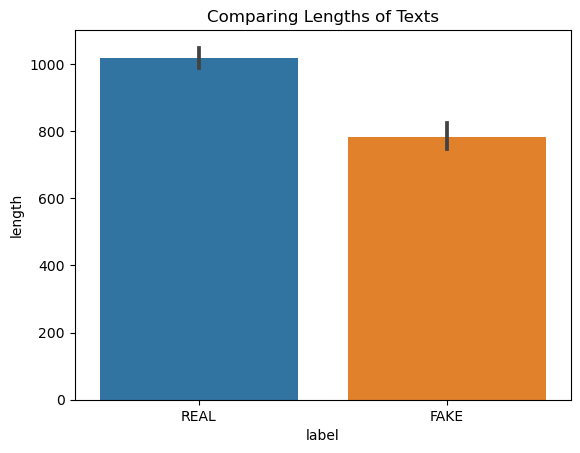

The median character length for real news is 894.0 and 489.0 for fake news.


In [16]:
ax = sns.barplot(data=df, x='label', y='length');
ax.set_title('Comparing Lengths of Texts')

plt.show()

real_len = real['length'].median()
fake_len = fake['length'].median()
print(f'The median character length for real news is {real_len} and {fake_len} for fake news.')

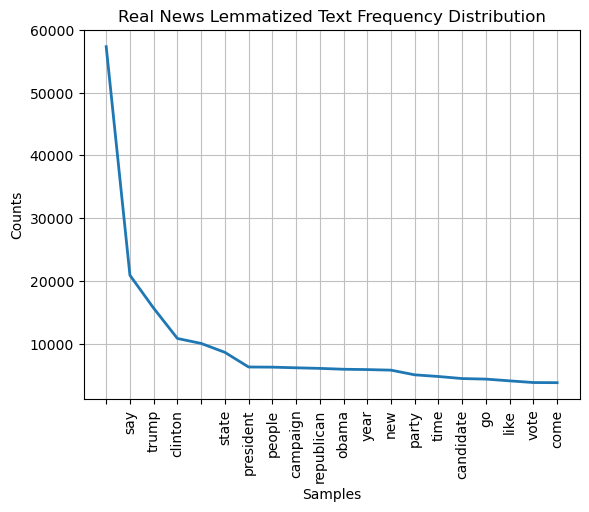

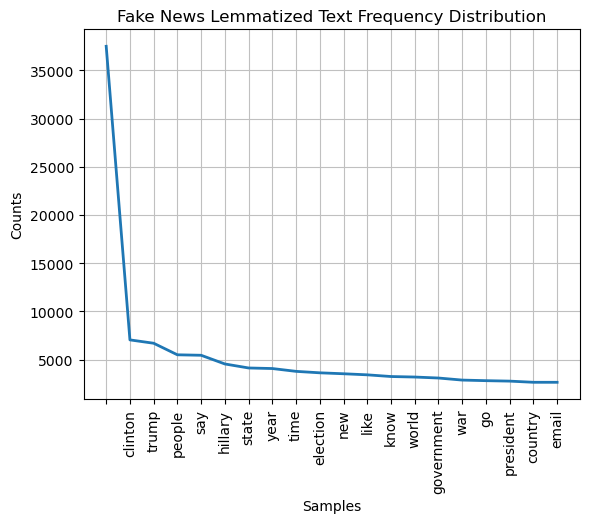

In [17]:
real_words = real['lemmas'].explode().to_list()
real_freq_dist = FreqDist(real_words)
fake_words = fake['lemmas'].explode().to_list()
fake_freq_dist = FreqDist(fake_words)

## Plot the distribution
real_freq_dist.plot(20, title='Real News Lemmatized Text Frequency Distribution')

fake_freq_dist.plot(20, title='Fake News Lemmatized Text Frequency Distribution');

In [18]:
def plot_wordclouds(high_cloud, low_cloud, title='Comparing Word Usage'):
    """Plots the wordlcouds for our two groups"""
    ## Plot the Images
    fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
    axes[0].imshow(high_cloud)
    axes[0].set_title('High Ratings')
    axes[0].axis('off')
    
    axes[1].imshow(low_cloud)
    axes[1].set_title('Low Ratings')
    axes[1].axis('off')
    fig.tight_layout()
    
    fig.suptitle(title,y=1.0, fontsize='xx-large');
    return fig

In [19]:
real_lemmas = ' '.join(real_words)
fake_lemmas = ' '.join(fake_words)

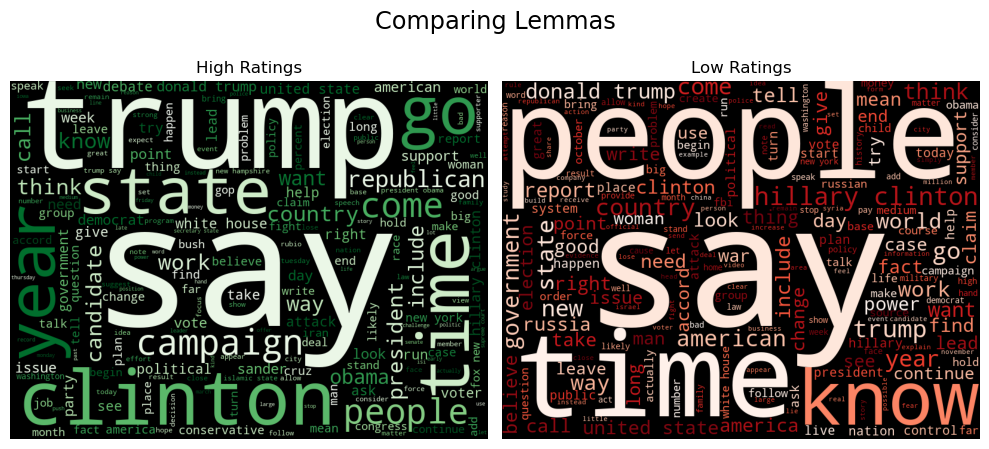

In [20]:
wordcloud_kws = dict(min_word_length=2,width=800, height=600, random_state=42)
real_cloud = WordCloud(**wordcloud_kws, colormap='Greens').generate(real_lemmas)
fake_cloud = WordCloud(**wordcloud_kws, colormap='Reds').generate(fake_lemmas)

## Plot the Images
fig = plot_wordclouds(real_cloud, fake_cloud, title='Comparing Lemmas')